<ipython-input-22-0c986dd28491>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list, rotation=90)


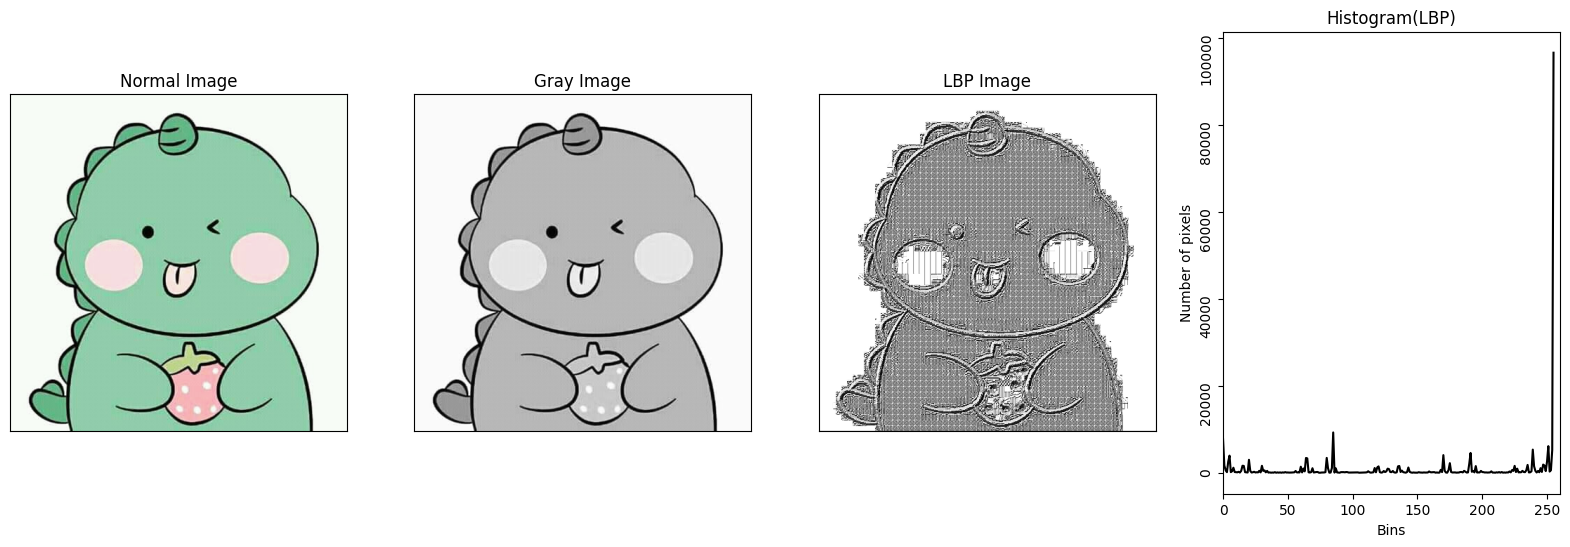

LBP Program selesai 


In [22]:
#Latihan 1. EKSTRASI FITUR LBP
import cv2 # OpenCV
import numpy as np # NumPy
from matplotlib import pyplot as plt # Matplotlib

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

# Fungsi untuk menghitung lbp pada pixel
def lbp_calculated_pixel(img, x, y):
    '''
    Format :
    64 | 128 | 1
    -------------
    32 | 0   | 2
    -------------
    16 | 8   | 4
    '''
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))  # top_right
    val_ar.append(get_pixel(img, center, x, y+1))    # right
    val_ar.append(get_pixel(img, center, x+1, y+1))  # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))    # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))  # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))    # left
    val_ar.append(get_pixel(img, center, x-1, y-1))  # top_left
    val_ar.append(get_pixel(img, center, x-1, y)) # top

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
            val += val_ar[i] * power_val[i]
    return val

# Fungsi menampilkan output
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap=plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color="black")
            current_plot.set_xlim([0, 260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation=90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)

    plt.show()

# Fungsi utama
image_file = 'dino.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp [i,j] = lbp_calculated_pixel (img_gray, i, j)
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                    })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                    })
output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                    })
output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                    })
show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program selesai ")




<ipython-input-22-0c986dd28491>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list, rotation=90)


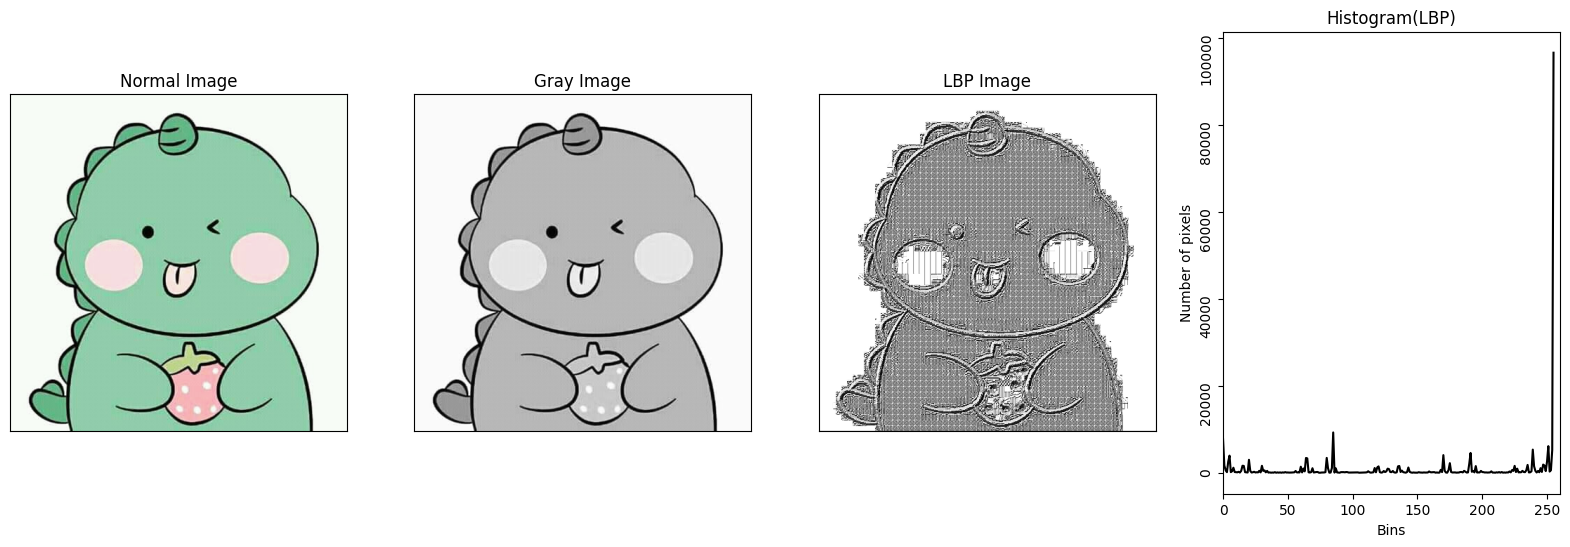

LBP Program selesai


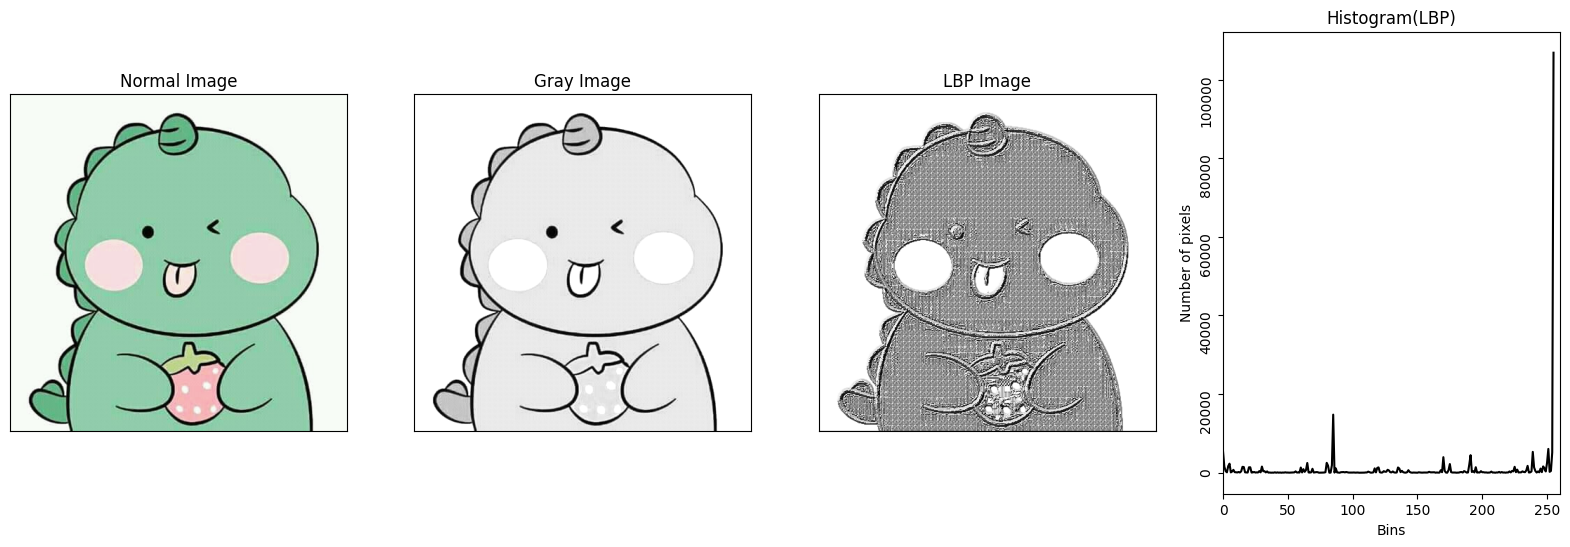

LBP Program selesai


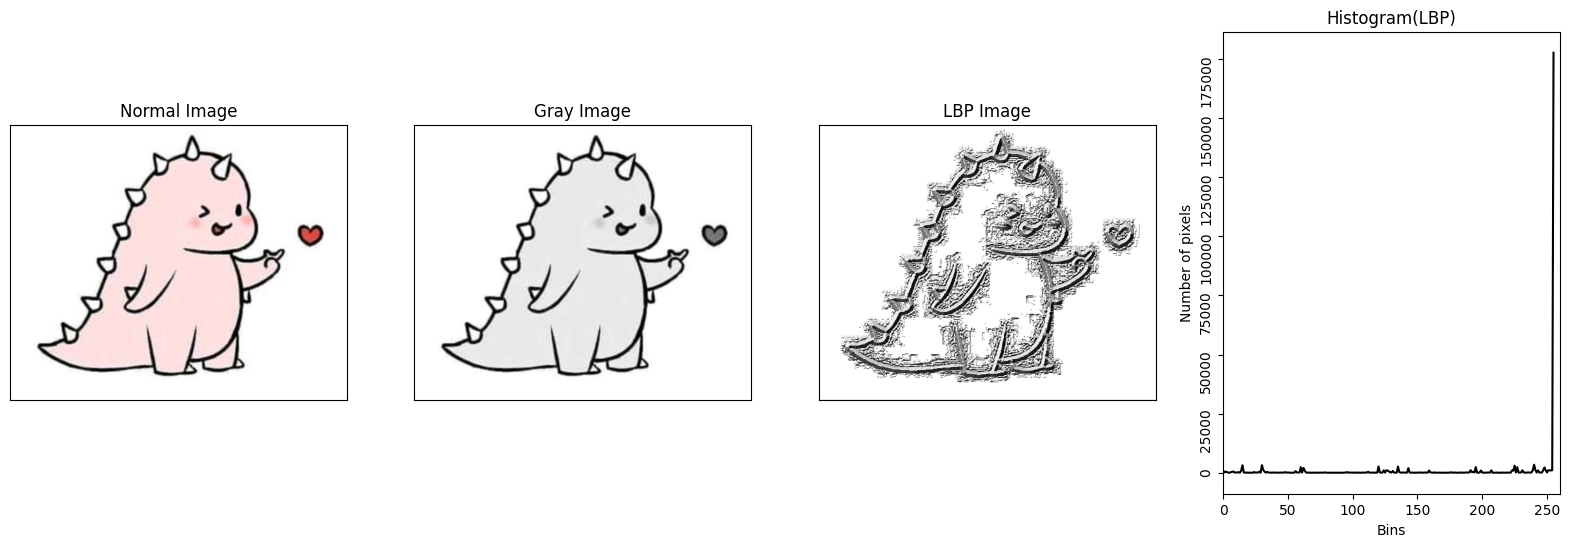

LBP Program selesai


In [23]:
# Mencoba untuk menggunakan brightness yang berbeda
def brighter(nilai, img):
    img_b = np.zeros((height, width, 3), np.uint8)
    for y in range(0, height):
        for x in range(0, width):
            red = img[y][x][2] + nilai
            green = img[y][x][1] + nilai
            blue = img[y][x][0] + nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_b[y][x] = (red, green, blue)
    return img_b

image_file = 'dino.jpg'
image_file2 = 'dino pink.png'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(brighter(50, img_bgr), cv2.COLOR_BGR2GRAY)
img_bgr2 = cv2.imread(image_file2)
height2, width2, channel2 = img_bgr2.shape
img_gray3 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

def lbp(img_gray, height, width, img_bgr):
    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                })
    output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                })
    output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                })
    output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                })

    show_output(output_list)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("LBP Program selesai")

lbp(img_gray, height, width, img_bgr)
lbp(img_gray2, height, width, img_bgr)
lbp(img_gray3, height2, width2, img_bgr2)

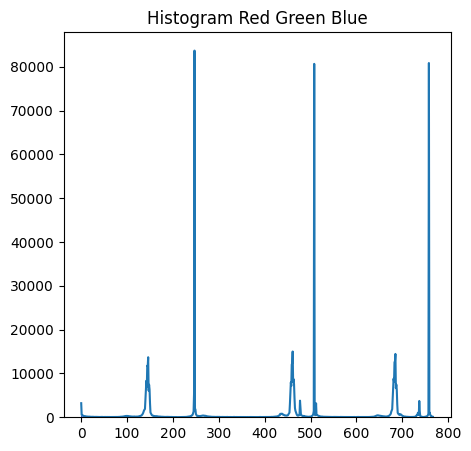

In [74]:
#Latihan 2. Ekstraksi Fitur Berdasarkan Warna
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

#membaca gambar
# img = imageio.imread("dino.jpg")
img_bgr = cv2.imread("dino.jpg")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
height, width, channel = img_bgr.shape

#membuat variabel untuk menyimpan data gambar
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768), dtype=np.int32)

#mengisi nilai dalam array hg dengan 0
def makeItZero():
    for x in range(0, 256):
        hgr[x] = 0
        hgg[x] = 0
        hgb[x] = 0
for x in range(0, 768):
    hgrgb[x] = 0

#menghitung nilai dari gambar
    makeItZero()

# th = int(256/64)
temp = [0]
for y in range(0, height):
    for x in range(0, width):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        red = red + 0
        green = green + 256
        blue = blue + 512
# temp.append(green)
        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

binsrgb = np.linspace(0, 768, 100)

binsr = np.linspace(0, 0, 100)
plt.hist(hgr, binsr, color = "red", alpha=0.5)
binsg = np.linspace(0, 256, 100)
plt.hist(hgr, binsg, color = "green", alpha=0.5)
binsb = np.linspace(0, 768, 100)
plt.hist(hgr, binsb, color = "blue", alpha=0.5)

#plt.hist(hgr, binsrgb, alpha=0.5)
plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show()

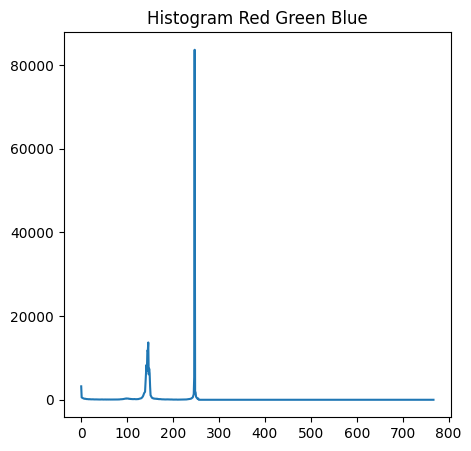

In [76]:
#menggunakan open cv
hist_img = cv2.calcHist([img], [0], None, [768], [0, 768])
plt.plot(hist_img)
plt.title("Histogram Red Green Blue")
plt.show()


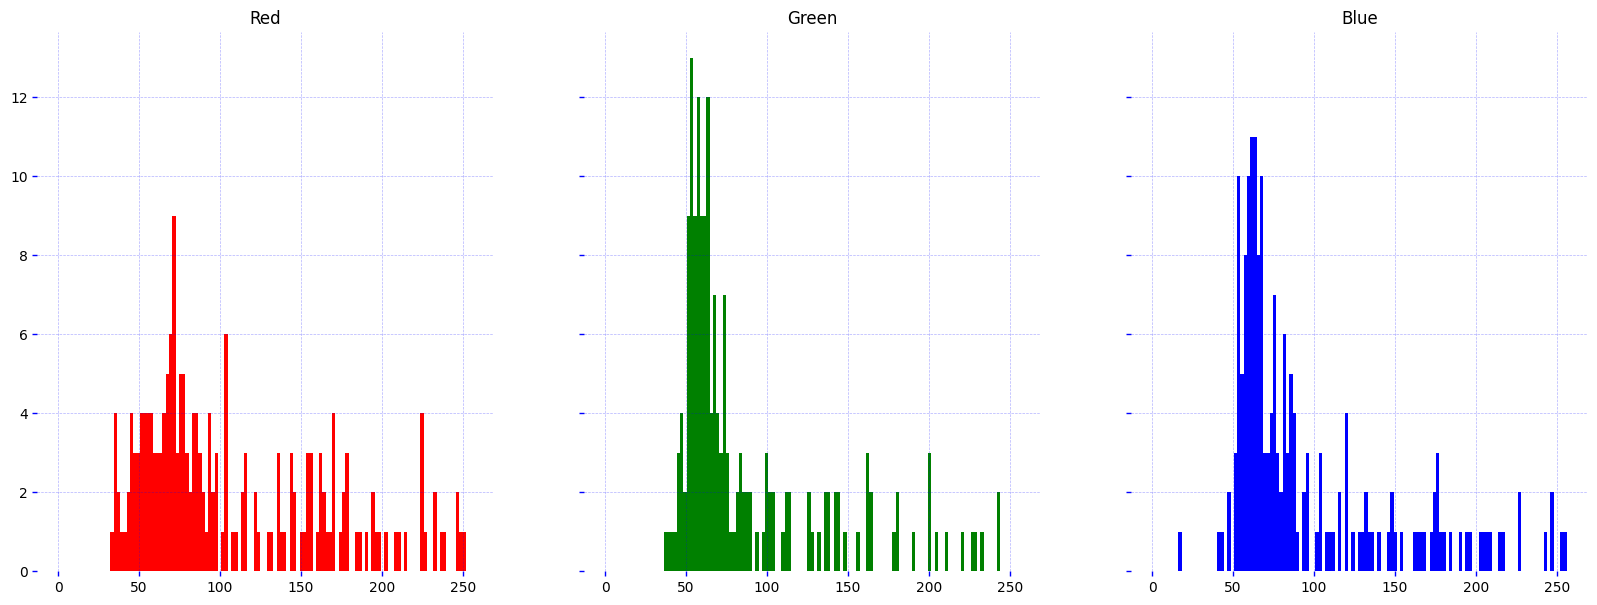

In [30]:
#menampilkan histogram
makeItZero()
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1
def plot_result(red, green, blue):
    bins = np.linspace(0, 256, 128)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

    for ax in [ax1, ax2, ax3]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='1')

    ax1.set_title('Red')
    ax2.set_title('Green')
    ax3.set_title('Blue')

    ax1.hist(red, bins, color="red", alpha=1)
    ax2.hist(green, bins, color="green", alpha=1)
    ax3.hist(blue, bins, color="blue", alpha=1)

plt.rcParams['figure.figsize'] = [20, 7]
plot_result(hgr, hgg, hgb)

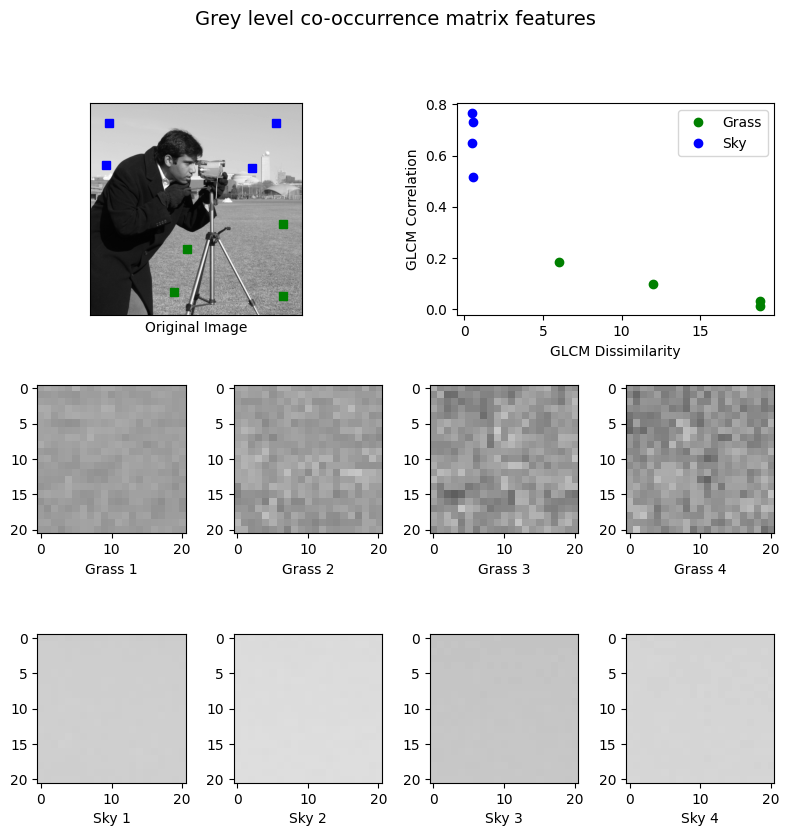

In [31]:
#latihan 3. ekstraksi fitur GLCM
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data

PATCH_SIZE = 21

# load image
image = data.camera()

grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# menghitung GLCM
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

fig = plt.figure(figsize=(8, 8))

# tampilkan original image dengan lokasi patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go', label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo', label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))

# display
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

jumlah titik terdeteksi =  453


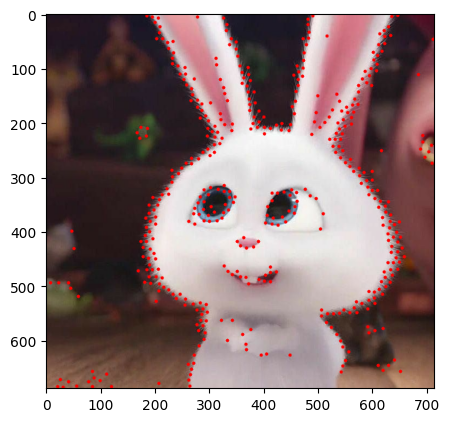

In [36]:
#latihan 4. menggunakan corner detector
import numpy as np
import cv2
from matplotlib import pyplot as plt
# gunakan gambar
img = cv2.imread('snowball.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# deteksi pojok dengan GFTT
corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)
# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("jumlah titik terdeteksi = ", corners.shape[0])
# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (5,5)
# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb)
plt.show()

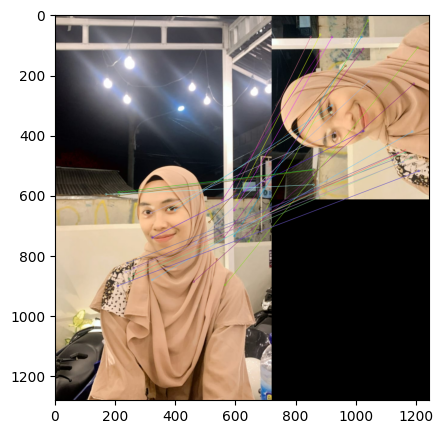

In [37]:
#latihan 5.Feature Detection and Matching
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('neng.jpg') # gambar yang dituju
img2 = cv2.imread('nong.jpg') # gambar yang dicari
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Mengurutkan hasil matching berdasarkan jarak
matches = sorted(matches, key=lambda x: x.distance)

# Menggambar hanya sejumlah tertentu (misalnya 30) pasangan kecocokan terbaik
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Menampilkan gambar
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

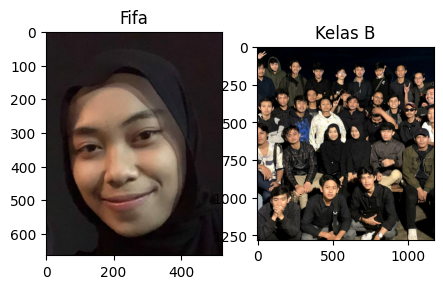

In [53]:
#Latihan 6. template matching mendeteksi einsten pada gambar.
# tampilkan kedua gambar
from matplotlib import pyplot as plt
# panggil dan konversi warna agar sesuai dengan Matplotlib
einstein = cv2.imread('fifa.jpg')
einstein = cv2.cvtColor(einstein, cv2.COLOR_BGR2RGB) # simpan dengan nama yang sama = ditumpuk
# panggil dan konversi warna agar sesuai dengan Matplotlib
solvay = cv2.imread('kelas.jpg')
solvay = cv2.cvtColor(solvay, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(einstein), plt.title('Fifa')
plt.subplot(122),plt.imshow(solvay), plt.title('Kelas B')
plt.show()

hasil metode cv2.TM_CCOEFF : 


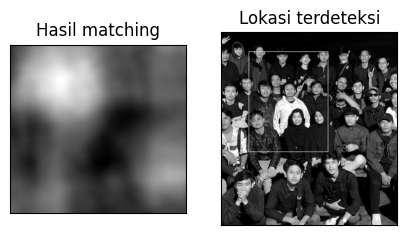

hasil metode cv2.TM_CCOEFF_NORMED : 


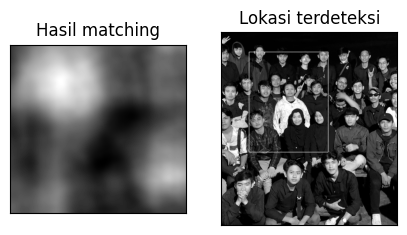

hasil metode cv2.TM_CCORR : 


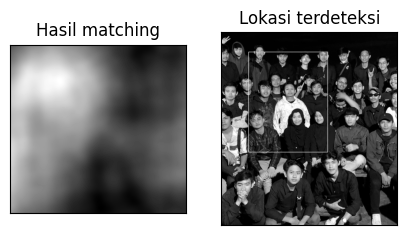

hasil metode cv2.TM_CCORR_NORMED : 


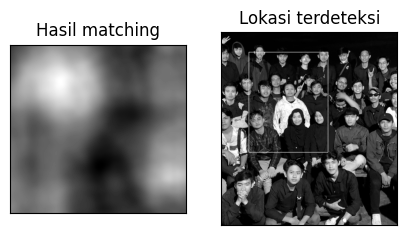

hasil metode cv2.TM_SQDIFF : 


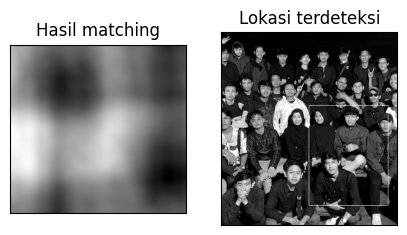

hasil metode cv2.TM_SQDIFF_NORMED : 


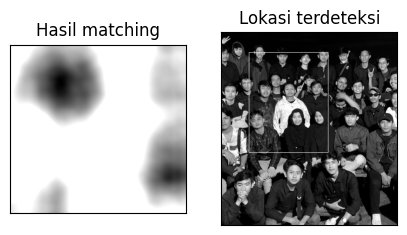

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('kelas.jpg',0)
img2 = img.copy()
template = cv2.imread('fifa.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (5,5)

for met in methods:
    img = img2.copy()
    method = eval(met)

    # menggunakan template matching
    res = cv2.matchTemplate(img,template,method)

    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikit berbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

# buat persegi pada lokasi yang ditemukan
    cv2.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan garis kotak
    print("hasil metode", met, ": " )
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])
    plt.show()

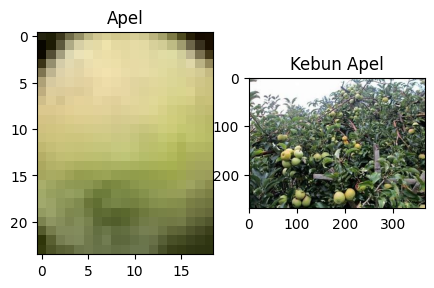

In [72]:
#latihan 7. Menghitung deteksi sawit dengan template matching
# tampilkan kedua gambar
from matplotlib import pyplot as plt
# panggil dan konversi warna agar sesuai dengan Matplotlib
sawit = cv2.imread('apel.jpg')
sawit = cv2.cvtColor(sawit, cv2.COLOR_BGR2RGB)
# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_sawit = cv2.imread('pohon apel.jpg')
kebun_sawit = cv2.cvtColor(kebun_sawit, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(sawit), plt.title('Apel')
plt.subplot(122),plt.imshow(kebun_sawit), plt.title('Kebun Apel')
plt.show()

Jumlah objek ditemukan: 15


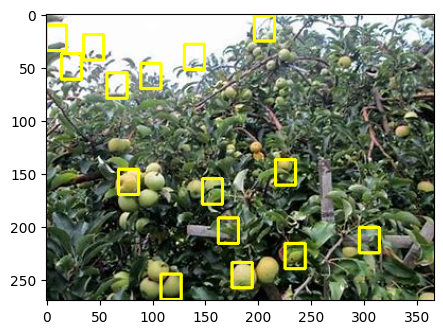

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar utuh untuk dicari
img_rgb = cv2.imread('pohon apel.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Membaca template
template = cv2.imread('apel.jpg', 0)

# Ukuran template. Ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# Menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Mendapatkan posisi lokasi terbaik (koordinat x dan y) dari hasil pencocokan
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Mendefinisikan batasan ambang batas deteksi kemiripan titik
threshold = 0.5

# Mencari posisi lokasi yang melebihi ambang batas
loc = np.where(res >= threshold)

# Membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0  # Untuk menyimpan jumlah matching yang ditemukan

for pt in zip(*loc[::-1]):
    # Jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # Gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        for i in range(pt[0] - 9, pt[0] + 9, 1):
            # Tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(pt[1] - 9, pt[1] + 9, 1):
            # Tambahkan koordinat y ke list
            lspoint2.append(k)
        count += 1  # Berapa jumlah matching yang ditemukan?
    else:
        continue

print("Jumlah objek ditemukan:", count)

# Tampilkan dengan imshow
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()